In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [109]:
data = pd.read_csv('train.csv')

In [110]:
strs = data['Sequence']
sequences = []
for line in strs:
    sequences.append([int(i) for i in line.split(',')])

total = len(sequences)
print('Total sequences count: {0}'.format(total))

Total sequences count: 113845


# Исследование датасета

In [29]:
def has_property_percent(f):
    n = 0
    for sequence in sequences:
        if (f(sequence)):
            n += 1
    return (n * 100. / total, n)

def print_percentage(f):
    percent, num = has_property_percent(f)
    print('{0}% ({1})'.format(percent, num))
    
def print_sequences(f):
    for sequence in sequences:
        if (f(sequence)):
            print(sequence, '\n')

In [30]:
def create_dict_percent(condition):
    my_dict = {}
    for i in range(0, 100):
        my_dict[i] = 0
    
    for sequence in sequences:
        sequence = np.array(sequence)
        mask = condition(sequence)
        percent_of_appr = len(sequence[mask]) * 100. / len(sequence)
        key = int(percent_of_appr)
        my_dict[key] += 1
    return my_dict

def plot_dict(d):
    x = np.arange(100)
    plt.bar(x, list(d.values()), width = [1] * len(x))
    labels = []
    for i in range(0, len(x)):
        if i % 10 == 0:
            labels.append(str(i) + '%')
        else:
            labels.append('')
    plt.xticks(x, labels)
    plt.ylabel('number of sequences')
    plt.show()   
    
def explore_by_dict(condition):
    plot_dict(create_dict_percent(condition))

In [31]:
# 1. static
def is_static(sequence):
    return len(np.unique(sequence)) == 1

print_percentage(is_static)

0.01932452018094778% (22)


In [32]:
# 2. возрастающая (строго)
def is_strictly_increasing(sequence):
    return np.all(np.diff(sequence) > 0)

print_percentage(is_strictly_increasing)

52.321138389916115% (59565)


In [33]:
# 3. возрастающая (нестрого)
def is_non_strictly_increasing(sequence):
    return np.all(np.diff(sequence) >= 0)

print_percentage(is_non_strictly_increasing)

63.42044007202776% (72201)


In [34]:
# 4. убывающая (строго)
def is_strictly_decreasing(sequence):
    return np.all(np.diff(sequence) < 0)

print_percentage(is_strictly_decreasing)

0.20466423646185603% (233)


In [35]:
# 5. убывающая (нестрого)
def is_non_strictly_decreasing(sequence):
    return np.all(np.diff(sequence) <= 0)

print_percentage(is_non_strictly_decreasing)

0.3838552417760991% (437)


In [36]:
# 6. монотонная (строго)
def is_strictly_monotonic(sequence):
    diff = np.diff(sequence)
    return np.all(diff > 0) or np.all(diff < 0)

print_percentage(is_strictly_monotonic)

52.52053230269226% (59792)


In [37]:
# 7. монотонная (нестрого)
def is_non_strictly_monotonic(sequence):
    diff = np.diff(sequence)
    return np.all(diff >= 0) or np.all(diff <= 0)

print_percentage(is_non_strictly_monotonic)

63.78497079362291% (72616)


In [38]:
# 8. колеблющаяся (процент пар элементов, на которых последовательность возрастает, и пар, на которых убывает, не меньше порогового)
def is_oscillating(sequence, threshold = 0.333):
    n = len(sequence)
    diff = np.diff(sequence)
    return (len(diff[diff > 0]) * 1. / n) >= threshold and (len(diff[diff < 0]) * 1. / n) >= threshold

print_percentage(is_oscillating)

20.659668847995082% (23520)


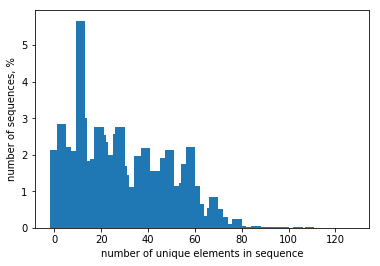

In [39]:
# 9. классификация по количеству уникальных элементов
dict_unique_num = {}
for sequence in sequences:
    unique_num = len(np.unique(sequence))
    prev_num = dict_unique_num.get(unique_num)
    if (prev_num is None):
        dict_unique_num[unique_num] = 1
    else :
        dict_unique_num[unique_num] += 1
for key in sorted(dict_unique_num):
    dict_unique_num[key] = dict_unique_num[key] * 100. / total
    
plt.bar(range(len(dict_unique_num)), list(dict_unique_num.values()), align = 'center', width = 4)
plt.xlabel('number of unique elements in sequence')
plt.ylabel('number of sequences, %')
plt.show()

In [40]:
# 10. Мало повторов элементов?
def number_of_unique_elements_fits_condition(sequence, condition):
    return condition(len(np.unique(sequence)))

def lots_of_repetitions(sequence, threshold = 0.5):
    condition = lambda x : x * 1. / len(sequence) <= threshold
    return number_of_unique_elements_fits_condition(sequence, condition)

print_percentage(lots_of_repetitions)

18.172954455619482% (20689)


In [41]:
# 11. Нет повторов элементов? 
def no_repetitions(sequence):
    condition = lambda x : x== len(sequence)
    return number_of_unique_elements_fits_condition(sequence, condition)

print_percentage(no_repetitions)

59.68553735341912% (67949)


In [42]:
# 12. арифметическая прогрессия
def is_arithmetic_progression(sequence):
    return len(np.unique(np.diff(sequence))) == 1

print_percentage(is_arithmetic_progression)

0.31534103386182966% (359)


In [43]:
# 13. геометрическая прогрессия
def is_geometric_progression(sequence):
    if (0 in sequence or len(sequence) < 2):
        return False
    q = sequence[1] * 1. / sequence[0]
    for i in range(2, len(sequence)):
        if sequence[i] * 1. / sequence[i - 1] != q:
            return False
    return True

print_percentage(is_geometric_progression)

0.1405419649523475% (160)


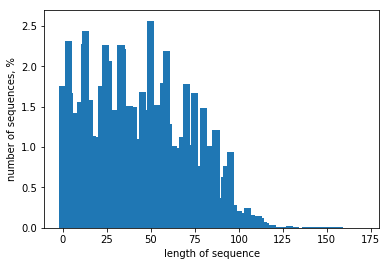

In [44]:
# 14. классификация по количеству элементов
dict_num = {}
for sequence in sequences:
    num = len(sequence)
    prev_num = dict_num.get(num)
    if (prev_num is None):
        dict_num[num] = 1
    else :
        dict_num[num] += 1
for key in sorted(dict_num):
    dict_num[key] = dict_num[key] * 100. / total
    
plt.bar(range(len(dict_num)), list(dict_num.values()), align = 'center', width = 4)
plt.xlabel('length of sequence')
plt.ylabel('number of sequences, %')
plt.show()

Mode < 0:  2.2267117572137556 %
Mode > 0:  97.55456980982915 %
Mode = 0:  0.21871843295709079 %


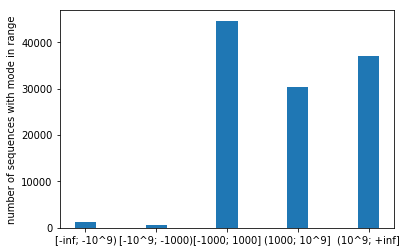

In [45]:
# 15. классификация по среднему значению
avs = []
for sequence in sequences:
    avs.append(np.mean(sequence))
avs = np.array(avs)   

print('Mode < 0: ', len(avs[avs < 0]) * 100. / total, '%')
print('Mode > 0: ', len(avs[avs > 0]) * 100. / total, '%')
print('Mode = 0: ', len(avs[avs == 0]) * 100. / total, '%')

av_in_range = []
av_in_range.append(len(avs[avs < -1000000000]))
mask = (avs >= -1000000000) & (avs < -1000)
av_in_range.append(len(avs[mask]))
mask = (avs >= -1000) & (avs <= 1000)
av_in_range.append(len(avs[mask]))
mask = (avs > 1000) & (avs <= 1000000000)
av_in_range.append(len(avs[mask]))
av_in_range.append(len(avs[avs > 1000000000]))

x = np.arange(5)
plt.bar(x, height = list(av_in_range), width = 0.3)
plt.xticks(x, ['[-inf; -10^9)', '[-10^9; -1000)', '[-1000; 1000]', '(1000; 10^9]', '(10^9; +inf]'])
plt.ylabel('number of sequences with mode in range')
plt.show()

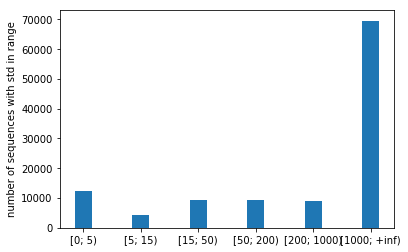

In [46]:
# 16. классификация по среднеквадратичному отклонению
stds = []

for sequence in sequences:
    stds.append(np.std(sequence))
stds = np.array(stds)

stds_in_range = []
stds_in_range.append(len(stds[stds < 5]))
mask = (stds >= 5) & (stds < 15)
stds_in_range.append(len(stds[mask]))
mask = (stds >= 15) & (stds < 50)
stds_in_range.append(len(stds[mask]))
mask = (stds >= 50) & (stds < 200)
stds_in_range.append(len(stds[mask]))
mask = (stds >= 200) & (stds < 1000)
stds_in_range.append(len(stds[mask]))
stds_in_range.append(len(stds[stds >= 1000]))

x = np.arange(6)
plt.bar(x, height = list(stds_in_range), width = 0.3)
plt.xticks(x, ['[0; 5)', '[5; 15)', '[15; 50)', '[50; 200)', '[200; 1000)', '[1000; +inf)'])
plt.ylabel('number of sequences with std in range')
plt.show()

In [47]:
# 17. Есть ли у элементов НОД > 1?
from math import gcd
def is_gcd_greater_than_1(sequence):
    if (len(sequence) < 2):
        return False
    cur_gcd = gcd(sequence[0], sequence[1])
    for i in range(2, len(sequence)):
        cur_gcd = gcd(cur_gcd, sequence[i])
        if cur_gcd == 1:
            return False
    return cur_gcd > 1

print_percentage(is_gcd_greater_than_1)

8.855900566559797% (10082)


In [48]:
# 18. Все элементы > 0
def are_all_positive(sequence):
    sequence = np.array(sequence)
    return np.all(sequence > 0)

print_percentage(are_all_positive)

72.20079933242566% (82197)


In [49]:
# 19. Все элементы < 0
def are_all_negative(sequence):
    sequence = np.array(sequence)
    return np.all(sequence < 0)

print_percentage(are_all_negative)

0.021081294742852124% (24)


In [50]:
# 20. Все элементы >= 0
def are_all_non_negative(sequence):
    sequence = np.array(sequence)
    return np.all(sequence >= 0)

print_percentage(are_all_non_negative)

94.36514559269182% (107430)


In [51]:
# 21. Все элементы <= 0
def are_all_non_positive(sequence):
    sequence = np.array(sequence)
    return np.all(sequence <= 0)

print_percentage(are_all_non_positive)

0.050068075014273794% (57)


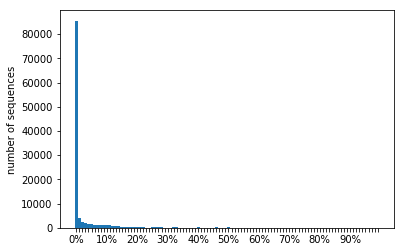

In [52]:
# 22. Процент нулей
explore_by_dict(lambda seq: seq == 0)

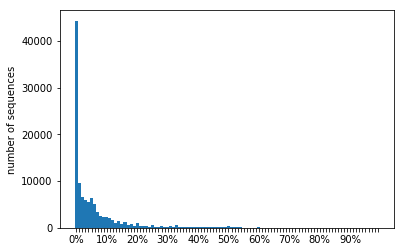

In [53]:
# 23. Процент единиц
explore_by_dict(lambda seq: seq == 1)

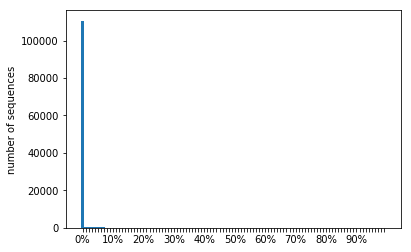

In [54]:
# 24. Процент минус единиц
explore_by_dict(lambda seq: seq == -1)

In [55]:
# 25. Содержит все элементы между min и max
def contains_all_elements(sequence):
    return len(np.unique(sequence)) == max(sequence) - min(sequence) + 1

print_percentage(contains_all_elements)

8.950766392902631% (10190)


In [56]:
# 26. Содержит только однозначные числа
def contains_only_digits(sequence):
    unique_elements = np.unique(sequence)
    if len(unique_elements) > 10:
        return False
    for x in unique_elements:
        if x < 0 or x > 9:
            return False
    return True

print_percentage(contains_only_digits)

7.562914488998199% (8610)


In [40]:
# 27. Элементы последовательности нормально распределены
from scipy.stats import normaltest

alpha = 0.001
errors = 0

def is_normal(sequence):
    if len(sequence) < 8:
        return False
    try: 
        stat, p = normaltest(sequence)
        return p > alpha
    except:
        global errors
        errors += 1
        return False
    
print_percentage(is_normal)
print('{0}% of sequences could not be analyzed'.format(errors * 100. / total))

25.39154113048443% (28907)
0.26263779700469936% of sequences could not be analyzed


# Алгоритмы, работающие с конкретным типом последовательности 

1. Все нули

In [9]:
test_data = pd.read_csv('test.csv')
ids = np.array(data['Id'])

In [ ]:
strs = test_data['Sequence']
test_sequences = []
for line in strs:
    test_sequences.append([int(i) for i in line.split(',')])

In [43]:
with open('submission1.csv', 'w') as f:
    f.write('Id,Last\n')
    for x in ids:
        f.write('%d,%d\n' % (x, 0))

2. Арифметические и геометрические прогрессии

In [11]:
def handle_arithmetic_progression(sequence):
    if len(sequence) <= 1:
        return None
    if is_arithmetic_progression(sequence):
        last = len(sequence) - 1
        d = sequence[last] - sequence[last - 1]
        return sequence[last] + d    
    else:
        return None

def handle_geometric_progression(sequence):
    if len(sequence) <= 1:
        return None
    if is_geometric_progression(sequence):
        last = len(sequence) - 1
        r = round(sequence[last] * sequence[last] // sequence[last - 1])
        return r
    else:
        return None

In [46]:
predicted = [0] * len(ids)
for i, sequence in enumerate(test_sequences):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        predicted[i] = pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            predicted[i] = pr

In [47]:
with open('submission2.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

3. Рекуррентные соотношения второго - четвертого порядков

In [12]:
from numpy import linalg as la

def handle_linear_recurrence(sequence, order):
    if len(sequence) <= 2 * order:
        return None
    a = []
    for i in range(0, order):
        a.append(sequence[i:order + i])
    b = sequence[order:2*order]
    try:
        c = la.solve(a, b)
    except:
        return None
    for i in range(order, len(sequence) - order):
        if np.dot(c, sequence[i:order + i]) != sequence[order + i]:
            return None
    return np.dot(c, sequence[-order:])

In [49]:
predicted = [0] * len(ids)
for i, sequence in enumerate(test_sequences):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        predicted[i] = pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            predicted[i] = pr
        else:
            pr = handle_linear_recurrence(sequence, 2)
            if pr is not None:
                predicted[i] = pr
            else:
                pr = handle_linear_recurrence(sequence, 3)
                if pr is not None:
                    predicted[i] = pr
                else:
                    pr = handle_linear_recurrence(sequence, 4)
                    if pr is not None:
                        predicted[i] = pr

In [50]:
with open('submission3.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

4. Рекуррентные соотношения всех возможных порядков

In [51]:
predicted = [0] * len(ids)
for i, sequence in enumerate(test_sequences):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        predicted[i] = pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            predicted[i] = pr
        else:
            for q in range(2, len(sequence) // 2):
                pr = handle_linear_recurrence(sequence, q)
                if pr is not None:
                    predicted[i] = pr
                    break

In [52]:
with open('submission4.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

5. Интерполяция по Ньютону

In [13]:
def newton_interpolation(sequence, order):
    if (len(sequence) <= order + 1):
        return None
    h = 1
    
    #count coeffs
    div_diff_old = sequence[:order + 1].copy()
    div_diff_new = []
    c = [sequence[0]]
    for i in range(0, order):
        div_diff_new = []
        for j in range(0, order - i):
            div_diff_new.append(div_diff_old[j + 1] - div_diff_old[j])
        div_diff_old = div_diff_new.copy()
        c.append(div_diff_new[0] / np.math.factorial(i + 1))
    if (c[len(c) - 1] == 0):
        return None
        
    #check other points and predict next if everything is ok
    for i in range(order, len(sequence) + 1):
        next_point = 0
        q = (i + 1 - 1) / h
        for j in range(0, len(c)):
            mn = 1
            for k in range(0, j):
                mn *= q - k
            next_point += c[j] * mn
        if i == len(sequence):
            return next_point
        if next_point != sequence[i]:
            return None

In [ ]:
predicted = [0] * len(ids)
for i, sequence in enumerate(test_sequences):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        predicted[i] = pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            predicted[i] = pr
        else:
            found_model = False
            for q in range(2, len(sequence) // 2):
                pr = handle_linear_recurrence(sequence, q)
                if pr is not None:
                    predicted[i] = pr
                    found_model = True
                    break
            if found_model == True:
                continue
            found_model = False
            for order in range(1, 10):
                pr = newton_interpolation(sequence, order)
                if pr is not None:
                    predicted[i] = pr
                    found_model = True
                    break

In [ ]:
with open('submission5.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

6. Десятичное представление числа вида 1/m

In [14]:
def divide_accurately(numerator, denominator, accuracy):
    numerator *= 10 ** (accuracy + 1)
    fract = numerator // denominator
    digits_after_point = []
    while fract > 0:
        digits_after_point.append(fract % 10)
        fract = fract // 10
    for i in range(len(digits_after_point), accuracy + 1):
        digits_after_point.append(0)
    digits_after_point = np.fliplr([np.array(digits_after_point)])[0]
    return digits_after_point
        

def get_possible_int(sequence):
    denominator = 0
    mn = 1
    eps = 0.000001
    for x in sequence:
        mn *= 0.1
        denominator += mn * x
    if np.abs((1 / denominator) - round(1 / denominator)) < eps:
        return round(1 / denominator)
    return None

def handle_decimal_expansion(sequence):
    if (len(sequence) <= 2):
        return None
    if (contains_only_digits(sequence) == False):
        return None
    possible_int = get_possible_int(sequence)
    if possible_int is None:
        return None
    possible_float = divide_accurately(1, possible_int, len(sequence) + 2)
    for i, x in enumerate(sequence):
        if x != possible_float[i]:
            return None
    return possible_float[len(sequence)]

In [ ]:
predicted = [0] * len(ids)
for i, sequence in enumerate(test_sequences):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        predicted[i] = pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            predicted[i] = pr
        else:
            found_model = False
            for q in range(2, len(sequence) // 2):
                pr = handle_linear_recurrence(sequence, q)
                if pr is not None:
                    predicted[i] = pr
                    found_model = True
                    break
            if found_model == True:
                continue
            found_model = False
            for order in range(1, 10):
                pr = newton_interpolation(sequence, order)
                if pr is not None:
                    predicted[i] = pr
                    found_model = True
                    break
            if found_model == True:
                continue
            found_model = False
            pr = handle_decimal_expansion(sequence)
            if pr is not None:
                predicted[i] = pr

In [ ]:
with open('submission6.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

7. Частичные суммы

In [15]:
def handle_partial_sums(sequence):
    if len(sequence) == 0:
        return None
    initial_sequence = np.hstack((np.array(sequence[0]), np.diff(sequence)))
    next_element = apply_determinate_algorithms(initial_sequence)
    if next_element is None:
        return None
    return sequence[-1] + next_element

In [16]:
def apply_determinate_algorithms(sequence):
    pr = handle_arithmetic_progression(sequence)
    if pr is not None:
        return pr
    else:
        pr = handle_geometric_progression(sequence)
        if pr is not None:
            return pr
        else:
            found_model = False
            for q in range(2, len(sequence) // 2):
                pr = handle_linear_recurrence(sequence, q)
                if pr is not None:
                    return pr
            for order in range(1, 10):
                pr = newton_interpolation(sequence, order)
                if pr is not None:
                    return pr
            pr = handle_decimal_expansion(sequence)
            if pr is not None:
                return pr
    return None

In [ ]:
predicted = [None] * len(ids)
for i, sequence in enumerate(test_sequences):
    predicted[i] = apply_determinate_algorithms(sequence)
    if predicted[i] is None:
        predicted[i] = handle_partial_sums(sequence)

In [ ]:
with open('submission7.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

# Марковы цепи

In [15]:
def markov(depth):
    for cur_depth in range(0, depth + 1):
        distributions = {}
        most_possibles = {}
        for sequence in np.hstack((sequences, test_sequences)):
            for i in range(0, len(sequence) - cur_depth):
                cur_tuple_prefix = tuple(sequence[i:(i + cur_depth)])
                next_item = sequence[i + cur_depth]
                if cur_tuple_prefix in distributions:
                    distribution = distributions[cur_tuple_prefix]
                    if next_item in distribution:
                        distribution[next_item] += 1
                    else:
                        distribution[next_item] = 1                        
                else:
                    distributions[cur_tuple_prefix] = {next_item: 1}
        for (prefix, distribution) in distributions.items():
            most_possibles[prefix] = max(distribution.items(), key=lambda entry : entry[1])[0]
        np.save('most_possibles{0}'.format(cur_depth), most_possibles)

In [18]:
def handle_markov(sequence, depth, most_possibles):
    length = len(sequence)
    if length >= depth:
        prefix = tuple(sequence[(length - depth):])
        if prefix in most_possibles:
            return most_possibles[prefix]
    return None

In [57]:
depth = 30
markov(depth)

In [58]:
predicted = [None] * len(ids)
for i, sequence in enumerate(test_sequences):
    predicted[i] = apply_determinate_algorithms(sequence)
    if predicted[i] is None:
        predicted[i] = handle_partial_sums(sequence)
for cur_depth in range(depth, -1, -1):
    most_possibles = np.load('most_possibles{0}.npy'.format(cur_depth)).item()
    for i, sequence in enumerate(test_sequences):
        if predicted[i] is None:
            predicted[i] = handle_markov(sequence, cur_depth, most_possibles)
for i, x in enumerate(predicted):
    if x is None:
        predicted[i] = 0

In [81]:
with open('submission8.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(predicted):
        f.write('%d,%d\n' % (ids[i], x))

# Нейронные сети

In [202]:
import keras

In [203]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [287]:
test_data = pd.read_csv('test.csv')
ids = np.array(test_data['Id'])
strs = test_data['Sequence']
test_sequences = []
for line in strs:
    test_sequences.append([int(i) for i in line.split(',')])

In [205]:
dim = 10

In [273]:
model = Sequential()
model.add(Dense(5, activation='relu', input_dim=dim))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [314]:
def baseline_model():
    model = Sequential()
#     model.add(Dense(5, activation='relu', input_dim=dim))
#     model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='sgd',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'],
             )
    return model

In [274]:
model.compile(optimizer='sgd',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'],
             )

In [117]:
x_train = []
y_train = []
for sequence in sequences:
    for i in range(0, len(sequence) - dim - 1):
        x_train.append(sequence[i:i+10])
        y_train.append(sequence[i+10])

In [118]:
x_train = np.array(x_train)
y_train = np.array(y_train)
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# x_train = sc.fit_transform(x_train)
# y_train = sc.fit_transform(y_train.reshape(-1, 1))

In [280]:
indices = np.random.choice(np.arange(len(x_train_small)), size = len(x_train_small) // 10)
x_train_very_small = x_train_small[indices]
y_train_very_small = y_train_small[indices]

In [281]:
# model.fit(x_train, y_train, epochs=1, batch_size=2, verbose=1)
model.fit(x_train_very_small, y_train_very_small, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
334688/334688 [==============================] - 40s 120us/step - loss: 35.1309 - acc: 0.0779
Epoch 2/5
334688/334688 [==============================] - 37s 109us/step - loss: 35.0623 - acc: 0.0780
Epoch 3/5
334688/334688 [==============================] - 37s 110us/step - loss: 35.0328 - acc: 0.0773
Epoch 4/5
334688/334688 [==============================] - 37s 110us/step - loss: 35.0243 - acc: 0.0772
Epoch 5/5
334688/334688 [==============================] - 38s 115us/step - loss: 35.0238 - acc: 0.0772


In [74]:
import keras.backend as K

def custom_loss(y_true, y_pred):
    diff = y_true - y_pred
    r = K.sum(K.sin(diff) / diff)
    print(r)
    return r

model.compile(
    optimizer='sgd',
    loss=custom_loss,
)

Tensor("loss_30/dense_18_loss/Sum:0", shape=(), dtype=float32)


In [285]:
y_pred = [0] * len(test_sequences)
for (i, sequence) in enumerate(test_sequences):
    if len(sequence) > 10:
        y_pred[i] = model.predict(np.array([sequence[-10:]]))

In [103]:
import math

In [310]:
nans = 0
with open('submission26.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(y_pred):
        if math.isnan(x) or math.isinf(x):
            x = 0
            nans += 1
        f.write('%d,%d\n' % (ids[i], x))
print('nans: ', nans)

nans:  287


In [136]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [218]:
def custom_loss(y_true, y_pred):
    diff = y_true - y_pred
#     return K.sum(K.zeros_like(diff))
    return K.sum(1 - K.sin(diff) / diff)

In [292]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
    return model

In [315]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=5, batch_size=32, verbose=1)

In [316]:
estimator.fit(x_train_very_small, y_train_very_small)

Epoch 1/5
334688/334688 [==============================] - 32s 97us/step - loss: 6.7830 - acc: 0.0186
Epoch 2/5
334688/334688 [==============================] - 35s 105us/step - loss: 19.7678 - acc: 0.0069
Epoch 3/5
334688/334688 [==============================] - 33s 100us/step - loss: 26.2861 - acc: 3.3165e-04
Epoch 4/5
119808/334688 [=========>....................] - ETA: 23s - loss: 23.5461 - acc: 1.7528e-04

KeyboardInterrupt: 

In [309]:
estimator.set_params(verbose=0)
y_pred = [0] * len(test_sequences)
for (i, sequence) in enumerate(test_sequences):
    if len(sequence) > 10:
        y_pred[i] = estimator.predict(np.array([sequence[-10:]]))

In [272]:
mask = np.all(a=x_train < 1000000000, axis=1)
x_train_small = x_train[mask]
y_train_small = y_train[mask]
print(x_train_small.shape)
print(y_train_small.shape)

(3346887, 10)
(3346887,)


In [6]:
import xgboost as xgb
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, LSTM
from time import time
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import catboost
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
strs = data['Sequence']
sequences = []
for line in strs:
    sequences.append([int(i) for i in line.split(',')])
test_data = pd.read_csv('test.csv')
ids = np.array(test_data['Id'])
strs = test_data['Sequence']
test_sequences = []
for line in strs:
    test_sequences.append([int(i) for i in line.split(',')])
sequences = np.array(sequences)
test_sequences = np.array(test_sequences)
data_size = len(test_sequences) #todo change for each process
y_pred = [0] * data_size

In [22]:
global_most_possibles = {}
def markov(depth):
    for cur_depth in range(0, depth + 1):
        distributions = {}
        most_possibles = {}
        for sequence in np.hstack((sequences, test_sequences)):
            for i in range(0, len(sequence) - cur_depth):
                cur_tuple_prefix = tuple(sequence[i:(i + cur_depth)])
                next_item = sequence[i + cur_depth]
                if cur_tuple_prefix in distributions:
                    distribution = distributions[cur_tuple_prefix]
                    if next_item in distribution:
                        distribution[next_item] += 1
                    else:
                        distribution[next_item] = 1                        
                else:
                    distributions[cur_tuple_prefix] = {next_item: 1}
        for (prefix, distribution) in distributions.items():
            most_possibles[prefix] = max(distribution.items(), key=lambda entry : entry[1])[0]
        global_most_possibles[cur_depth] = most_possibles
        
def handle_markov(sequence, depth):
    most_possibles = global_most_possibles[depth]
    length = len(sequence)
    if length >= depth:
        prefix = tuple(sequence[(length - depth):])
        if prefix in most_possibles:
            return most_possibles[prefix]
    return None

depth = 2
markov(depth)

In [17]:
np.concatenate((np.array([1, 2, 3]), np.array([4])))

array([1, 2, 3, 4])

In [19]:
for (j, sequence) in enumerate(test_sequences):
    expected = sequence[len(sequence) - 1]
    if j % 1000 == 0:
        print('Sequence {0}'.format(j))
    try:
        if len(sequence) < 5:
            continue
        n_train = len(sequence) // 2
        if len(sequence) >= 25:
            n_train = 17
        x_train = []
        y_train = []
        scaler = MinMaxScaler(feature_range=(0, 1))
        sequence = scaler.fit_transform(np.array(sequence).reshape(-1, 1)).reshape(-1)
        for i in range(len(sequence) - n_train - 1):
            x_train.append(np.concatenate((np.array([i + n_train + 1]), sequence[i:i+n_train])))
            y_train.append(sequence[i+n_train])
            
        x_train = np.array(x_train)#.reshape(-1, 1, n_train)
        y_train = np.array(y_train)

        regressor = LinearRegression()
        regressor.fit(x_train, y_train)

#         regressor = GradientBoostingRegressor(n_estimators=25)
#         regressor.fit(x_train, y_train)

#         model = Sequential()
#         model.add(SimpleRNN(n_train, activation='relu', kernel_initializer='normal', return_sequences=True))
#         model.add(Flatten())
#         model.add(Dense(1))
#         model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error', metrics=['accuracy'])


#         model.add(LSTM(4, input_shape=(1, n_train)))
#         model.add(Dense(1))
#         model.compile(loss='mean_squared_error', optimizer='adam')
#         model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)
        y_pred[j] = round(scaler.inverse_transform(regressor.predict(np.concatenate((np.array([len(sequence) + 1]), np.array(sequence[-n_train:]))).reshape(1, -1))[0])[0][0])
#         if y_pred[j] == expected:
#             print('Correct!')
#         else:
#             print('Wrong. Expected {0}, actual {1}'.format(expected, y_pred[j]))
    except Exception as e:
        print('Exception:', e)

nans = 0 
with open('submission38.csv', 'w') as f:
    f.write('Id,Last\n')
    for i, x in enumerate(y_pred):
        if math.isnan(x) or math.isinf(x):
            x = 0
            nans += 1
        f.write('%d,%d\n' % (ids[i], x))
print('nans: ', nans)

Sequence 0
Sequence 1000
Sequence 2000
Sequence 3000
Sequence 4000
Sequence 5000
Sequence 6000
Sequence 7000
Sequence 8000
Sequence 9000
Sequence 10000
Sequence 11000
Sequence 12000
Sequence 13000
Sequence 14000
Sequence 15000
Sequence 16000
Sequence 17000
Sequence 18000
Sequence 19000
Sequence 20000
Sequence 21000
Sequence 22000
Sequence 23000
Sequence 24000
Sequence 25000
Sequence 26000
Sequence 27000
Sequence 28000
Sequence 29000
Sequence 30000
Sequence 31000
Sequence 32000
Sequence 33000
Sequence 34000
Sequence 35000
Sequence 36000
Sequence 37000
Sequence 38000
Sequence 39000
Sequence 40000
Sequence 41000
Sequence 42000
Sequence 43000
Sequence 44000
Sequence 45000
Sequence 46000
Sequence 47000
Sequence 48000
Sequence 49000
Sequence 50000
Sequence 51000
Sequence 52000
Sequence 53000
Sequence 54000
Sequence 55000
Sequence 56000
Sequence 57000
Sequence 58000
Sequence 59000
Sequence 60000
Sequence 61000
Sequence 62000
Sequence 63000
Sequence 64000
Sequence 65000
Sequence 66000
Sequence

In [42]:
right = 0
wrong = 0
exceptions = 0
test_indices = np.random.choice(np.arange(len(sequences)), size=1000)
sample_sequences = sequences[test_indices]
x_train = []
y_train = []
x_test = []
y_expected = []
shorts = 0

scalers = [MinMaxScaler(feature_range=(0, 1))] * 1000
for (j, sequence) in enumerate(sample_sequences): #todo change for each process
    try:
        expected = sequence[len(sequence) - 1]
        sequence = scalers[j].fit_transform(np.array(sequence).reshape(-1, 1)).reshape(-1)
        if len(sequence) < 13:
            shorts += 1
            #print('too short')
            continue
        expected = sequence[len(sequence) - 1]
        n_train = 10
        for i in range(len(sequence) - n_train - 2):
            x_train.append(np.array(sequence[i:i+n_train]))
            y_train.append(sequence[i+n_train])
        x_test.append(sequence[-n_train-1:-1])
        y_expected.append(expected)
    except Exception as e:
        print('Exception:', e)

x_train = np.array(x_train)#.reshape(-1, 1, n_train)
y_train = np.array(y_train)
print(x_train.shape)


param = {}
bst = xgb.train(param, xgb.DMatrix(data=x_train, label=y_train), 10)
y_pred = bst.predict(xgb.DMatrix(data=np.array(x_test).reshape(-1, n_train)))
for (j, y) in enumerate(y_pred):
#     print('y', y)
    y_pred[j] = round(scalers[j].inverse_transform(np.array([[y]]))[0, 0])
rights = np.sum(y_pred == y_expected)
print('right', rights)
print('shorts: {0}'.format(shorts))

#print('right: {0}, wrong: {1}'.format(right, wrong))

/Users/ddzina/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ddzina/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(29684, 10)
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:18:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes,

In [51]:
right = 0
wrong = 0
exceptions = 0
test_indices = np.random.choice(np.arange(len(sequences)), size=1000)
sample_sequences = sequences[test_indices]
x_train = []
y_train = []
x_test = []
y_expected = []
shorts = 0

for (j, sequence) in enumerate(sample_sequences): #todo change for each process
    try:
        if np.any(np.isinf(np.array(sequence, dtype=np.float32))):
            print("contains inf")
            continue
        expected = sequence[len(sequence) - 1]
        if len(sequence) < 13:
            shorts += 1
            #print('too short')
            continue
        expected = sequence[len(sequence) - 1]
        n_train = 10
        for i in range(len(sequence) - n_train - 2):
            x_train.append(np.array(sequence[i:i+n_train]))
            y_train.append(sequence[i+n_train])
        x_test.append(sequence[-n_train-1:-1])
        y_expected.append(expected)
    except Exception as e:
        print('Exception:', e)

x_train = np.array(x_train)#.reshape(-1, 1, n_train)
y_train = np.array(y_train)
print(x_train.shape)

regressor = catboost.CatBoostRegressor(n_estimators=50, verbose=1)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
rights = np.sum(y_pred == y_expected)
print('right', rights)
print('shorts: {0}'.format(shorts))

#print('right: {0}, wrong: {1}'.format(right, wrong))

contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
contains inf
(29849, 10)
0:	learn: 362927581875378090465969569792.0000000	total: 19ms	remaining: 930ms
1:	learn: 362907771604283006777219350528.0000000	total: 35.8ms	remaining: 859ms
2:	learn: 362883139203813910561880539136.0000000	total: 52.1ms	remaining: 816ms
3:	learn: 362869900260874627568562601984.0000000	total: 78.5ms	remaining: 903ms
4:	learn: 362632206637533690822909755392.0000000	total: 95.2ms	remaining: 857ms
5:	learn: 362606762377732822106130874368.0000000	total: 113ms	remaining: 827ms
6:	learn: 362603657656525884284391653376.0000000	total: 130ms	remaining: 798ms
7:	learn: 362581011775340093451555307520.0000000	total: 146ms	remaining: 765ms
8:	learn: 361234642447770268360228470784.0000000	total

In [52]:
y_pred

array([ 8.06481297e+27,  7.20166120e+27,  7.20166120e+27,  5.25873797e+26,
       -5.38942475e+24,  7.11514876e+26,  1.58025628e+26, -7.31449859e+25,
       -9.44566534e+25, -1.75510209e+26,  9.01373179e+27,  2.74890658e+26,
       -9.68488991e+25, -4.77172988e+25, -2.35198768e+27,  1.89098429e+27,
        2.61748350e+26,  3.34628644e+26, -1.21394927e+25,  5.42058332e+26,
        1.10132684e+26, -5.44007716e+25, -6.71801413e+24,  9.87392482e+26,
       -7.76367250e+25,  7.20166120e+27,  1.88742601e+27,  4.71116286e+27,
       -4.77353743e+25,  3.62732226e+26, -7.31715893e+26,  7.20166120e+27,
        1.51216385e+27,  5.35191345e+26,  7.20166120e+27,  1.52863196e+27,
        9.48611624e+27,  7.20166120e+27,  9.21198472e+27, -7.90138312e+25,
        7.19598301e+27, -1.10346589e+26,  2.11814188e+26, -3.01136908e+26,
        2.35697983e+29, -3.52703384e+26,  1.73899492e+30,  8.77206623e+25,
       -1.65623927e+26,  7.20166120e+27,  8.77206623e+25, -2.05573930e+26,
        8.13665079e+27, -

In [17]:
right = 0
wrong = 0
exceptions = 0
test_indices = np.random.choice(np.arange(len(sequences)), size=100)
sample_sequences = sequences[test_indices]
for (j, sequence) in enumerate(sample_sequences): #todo change for each process
    try:
        if len(sequence) < 6:
            print('too short')
            continue
        n_train = 5
        x_train = []
        y_train = []
        for i in range(len(sequence) - n_train - 2):
            x_train.append(sequence[i:i+n_train])
            y_train.append(sequence[i+n_train])
        x_train = np.array(x_train).reshape(-1, 1, n_train)
        y_train = np.array(y_train)

        model = Sequential()
        model.add(SimpleRNN(n_train, activation='relu', kernel_initializer='normal', return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error', metrics=['accuracy'])


#         model.add(LSTM(4, input_shape=(1, n_train), activation='relu', kernel_initializer='normal'))
#         model.add(Dense(1))
#         model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)
        y_pred = int(model.predict(np.array(sequence[-n_train-1:-1]).reshape(-1, 1, n_train)))
        if y_pred == sequence[len(sequence) - 1]:
            print('Right! ({0})'.format(y_pred))
            right += 1
        else:
            print('Expected {0}, actual {1}'.format(sequence[len(sequence) - 1], y_pred))
            wrong += 1
    except Exception as e:
        print('Exception:', e)
print('right: {0}, wrong: {1}'.format(right, wrong))

Expected 248, actual 251
Expected 80043762, actual 79332120
Expected 3677313, actual -47155
Expected 86093442, actual 86520256
Expected 59427552583207598523644161, actual -40404359308928320798720
Expected 12348030976, actual 5410809856
Expected 35184369991680, actual -102678888448
Expected 3253, actual 3097
Expected 58806, actual -2077
Expected 6048, actual -103553
Expected 377, actual 378
Expected 36583, actual -1777
too short
Expected 2905990310033882693113989027594240, actual -9147432339938054504448
Expected 144, actual -2
Right! (0)
Expected 4, actual 0
Right! (0)
Expected 1472008290120323375502, actual 644398186001005019136
Expected 3000, actual -83
Expected 32151936434405, actual 0
Expected 17794687292056874401, actual 17717222506726686720
Expected 562379596107, actual -35758240
Expected 142, actual 144
Expected 49050, actual 52746
Expected 512, actual -321581
Expected 961380175077106319535, actual 387486052764260237312
Expected 362880, actual -14305393
Expected 2579, actual -104

In [23]:
exceptions = 0
for (j, sequence) in enumerate(test_sequences[]): #todo change for each process
    try:
        if len(sequence) < 3:
            y_pred[j] = handle_markov(sequence, len(sequence), )
            continue
        n_train = math.ceil(len(sequence) / 2)
        if len(sequence) >= 20:
            n_train = 10
        x_train = []
        y_train = []
        for i in range(len(sequence) - n_train - 1):
            x_train.append(sequence[i:i+n_train])
            y_train.append(sequence[i+n_train])
        x_train = np.array(x_train).reshape(-1, 1, n_train)
        y_train = np.array(y_train)
        model = Sequential()
        model.add(SimpleRNN(n_train, activation='relu', kernel_initializer='normal', return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=200, verbose=0)
        y_pred[j] = int(model.predict(np.array(sequence[-n_train:]).reshape(-1, 1, n_train)))
    except Exception as e:
        exceptions += 1

nans = 0
with open('submission_part1.csv', 'w') as f: #todo change filename for each process
    f.write('Id,Last\n')
    for i, x in enumerate(y_pred):
        if math.isnan(x) or math.isinf(x):
            x = 0
            nans += 1
        f.write('%d,%d\n' % (ids[i], x))
print('nans: ', nans)
print('exceptions: ', exceptions)

nans:  0
exceptions:  0


Text Approach

In [1]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
import math
import time
import warnings
warnings.filterwarnings('ignore')

/Users/ddzina/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
train_data = pd.read_csv('train.csv')
train_sequences = train_data['Sequence']
test_data = pd.read_csv('test.csv')
test_sequences = test_data['Sequence']
chars = [',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
y_pred = [0] * len(test_sequences)
exceptions = 0
n_train = 100
x_train = []
y_train = []

for (j, sequence) in enumerate(test_sequences):
    if j % 10000 == 0:
        print('sequence', j)
    sequence += ','
    if len(sequence) < 101:
        continue
    for i in range(len(sequence) - n_train - 1):
        x_train.append([char_to_int[char] for char in sequence[i:i + n_train]])
        y_train.append(char_to_int[sequence[i + n_train]])
        
x_train = np.reshape(x_train, (-1, n_train, 1))
y_train = np_utils.to_categorical(y_train)
model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1)

In [ ]:
for (j, sequence) in enumerate(test_sequences):
    word = ''
    seq_to_predict = [char_to_int[char] for char in sequence[-n_train:]]
    while True:
        try:
            x_test = np.reshape(seq_to_predict, (1, n_train, 1))
            prediction = model.predict(x_test, verbose=0)
            pred_int = np.argmax(prediction)
            pred_char = int_to_char[pred_int]
            if pred_char == ',':
                break
            word += pred_char
            seq_to_predict.append(pred_int)
            seq_to_predict = seq_to_predict[-n_train:]
        except Exception as e:
            print(e)
    y_pred[j] = word

In [ ]:
test_data = pd.read_csv('test.csv')
test_sequences = test_data['Sequence']
chars = [',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
y_pred = [0] * len(test_sequences)
exceptions = 0
n_train = 100

total_start = time.time()
for (j, sequence) in enumerate(test_sequences[:20]):
    start = time.time()
    if j % 1 == 0:
        print('Processing sequence {0}... '.format(j))
    if len(sequence) < 101:
        continue
    numbers = sequence.split(',')
    if len(numbers) < 4:
        continue
    len_n_train = 10
    if len(numbers) < 11:
        len_n_train = len(numbers) // 2
    len_sequence = [len(item) for item in numbers]
    len_x_train = []
    len_y_train = []
    for i in range(len(numbers) - len_n_train - 1):
        len_x_train.append(numbers[i:i + len_n_train])
        len_y_train.append(numbers[i + len_n_train])
    print('formed len train data')
    len_x_train = np.reshape(len_x_train, (-1, len_n_train, 1))
    len_y_train = np_utils.to_categorical(len_y_train)
    len_model = Sequential()
    len_model.add(LSTM(4, input_shape=(len_x_train.shape[1], len_x_train.shape[2])))
    len_model.add(Dropout(0.2))
    len_model.add(Dense(len_y_train.shape[1], activation='softmax'))
    len_model.compile(loss='categorical_crossentropy', optimizer='adam')
    len_model.fit(len_x_train, len_y_train, epochs=20, verbose=1)    
    print('len model fitted')
    len_prob = len_model.predict(np.reshape(numbers[-len_n_train:], (1, len_n_train, 1)), verbose=1)
    predicted_len = np.argmax(len_prob)
    print('predicted_len:', predicted_len)

    sequence += ','
    x_train = []
    y_train = []
    for i in range(len(sequence) - n_train - 1):
        x_train.append([char_to_int[char] for char in sequence[i:i + n_train]])
        y_train.append(char_to_int[sequence[i + n_train]])

    print('formed train data')
    x_train = np.reshape(x_train, (-1, n_train, 1))
    y_train = np_utils.to_categorical(y_train)
    model = Sequential()
    model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(x_train, y_train, epochs=20, verbose=1)
    print('model fitted')

    word = ''
    seq_to_predict = [char_to_int[char] for char in sequence[-n_train:]]
    for i in range(predicted_len):
        try:
            x_test = np.reshape(seq_to_predict, (1, n_train, 1))
            prediction = model.predict(x_test, verbose=1)
            pred_int = np.argmax(prediction)
            pred_char = int_to_char[pred_int]
            if pred_char == ',':
                break
            word += pred_char
            seq_to_predict.append(pred_int)
            seq_to_predict = seq_to_predict[-n_train:]
        except Exception as e:
            print(e)
    y_pred[j] = word
    end = time.time()
    if j % 1 == 0:
        print('Predicted: {0}. Time: {1}'.format(word, end - start))

total_end = time.time()
print('Total time: {0}'.format(total_end - total_start))

Processing sequence 0... 
Processing sequence 1... 
formed len train data
Epoch 1/20


In [9]:
a = '12,123,7777,'
b = [len(item) for item in a.split(',')][:-1]
b

[2, 3, 4]